In [371]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import hvplot.pandas
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
import requests
# Turn off warning messages
import warnings
warnings.filterwarnings('ignore')
from pathlib import Path

In [3]:
CVD_data_to_load = Path("datasets/CVD_cleaned.csv")
CVD_data_df = pd.read_csv(CVD_data_to_load)

In [285]:
# Prepare some data for further analysis

sex_df = CVD_data_df.groupby(['Sex'])['Sex'].count()
age_category_df = CVD_data_df.groupby(['Age_Category', 'Arthritis'])['Arthritis'].count()
# age_category_df.plot(kind ='bar', ) #autopct='%2.2f')
arthritis_df=CVD_data_df.groupby('Arthritis')['Arthritis'].count()
arthritis_by_sex = CVD_data_df.groupby(['Arthritis','Sex'])['Arthritis'].count()

no_arthritis_by_sex = CVD_data_df.loc[(CVD_data_df['Arthritis']=='No')].groupby(['Sex'])['Arthritis'].count()
CVD_data_df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,...,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Diet,myField
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,...,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0,23.0,6.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,...,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0,15.0,2.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,...,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0,7.5,10.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,...,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0,30.0,4.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,...,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,...,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0,19.0,2.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,...,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0,37.5,6.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,...,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0,24.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,...,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0,21.0,1.5


# Analysis of the Incidence of Arthritis by Sex

Text(0.5, 1.0, 'Arthritic Participants by Sex')

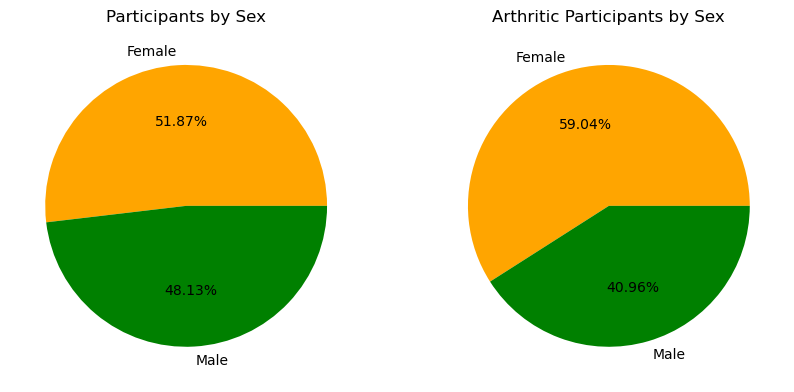

In [352]:
fig1, axes = plt.subplots(1,2, figsize=(10,10))

axes[0].pie(sex_df, labels=['Female','Male'], autopct='%2.2f%%', colors=['orange','green'] )
# plt.pie(sex_df, autopct = '%2.2f%%', colors=['orange','green'], labels=['Female', 'Male'])
axes[0].set_title('Participants by Sex')
axes[1].pie(arthritis_by_sex['Yes'], labels=['Female', 'Male'], autopct='%2.2f%%', colors=['orange','green'] )
axes[1].set_title('Arthritic Participants by Sex')

## Chi-Square Contingency Table Analysis Arthritis vs Sex:
### Alternative Hypothesis:
The incidence of arthritis is related to the sex of an individual.  
### Null Hypothesis: 
The distribution of indviduals having Arthritis by sex is the same as the distribution of inviduals by sex for individuals who don't have Arthritis and therefore Arthritis is unrelated to the sex of the individual and the variance we are seeing is by chance.


In [283]:
observed =[]
expected=[]
observed = pd.Series([arthritis_by_sex[0],arthritis_by_sex[1]], index=['Female','Male'])
expected = pd.Series([arthritis_by_sex[2],arthritis_by_sex[3]], index=['Female','Male'])
myChisqr = pd.DataFrame([observed, expected]).T
myChisqr.columns = [['No Arthritis', 'With Arthritis']]

myChisqr

,No Arthritis,With Arthritis
Female,100528,59668
Male,107255,41403


In [284]:
chi2_stat, p_value, dof, expected = st.chi2_contingency(myChisqr)
print('Chi 2 Stat ', chi2_stat)
print('P-value ', p_value)
print('Degrees of Freedom ', dof)
print('Expected ', expected)
print(f'The P-value of {p_value}, is less than 0.05 so we must reject the null hypothesis in favour of the alternative')

Chi 2 Stat  3091.3964382931063
P-value  0.0
Degrees of Freedom  1
Expected  [[107772.62223575  52423.37776425]
 [100010.37776425  48647.62223575]]
The P-value of 0.0, is less than 0.05 so we must reject the null hypothesis in favour of the alternative


### Analysis:
Using the distribution of individuals who do not have arthritis by sex and comparing that to the observed distribution of individuals who have Arthritis by sex, the chi-square contingency analysis results in a p-value of 0.0. This suggests there is no statistical relationship between the two groups and the observed variation we see is not happening by chance and we must reject the null hypothesis and assume the changes in the incidence of arthritis by sex is significnant. 

## T-Tests Arthritis vs BMI for Individuals with Arthritis vs Individuals without Arthritis
### Alternative Hypothesis:
The incidence of arthritis is related to an inviduals BMI score.
### Null Hypothesis:  
The incidence of arthritis is unrelated to an individuals BMI and the variance in the mean BMI between to the two groups  we are seeing is to be expected by chance.


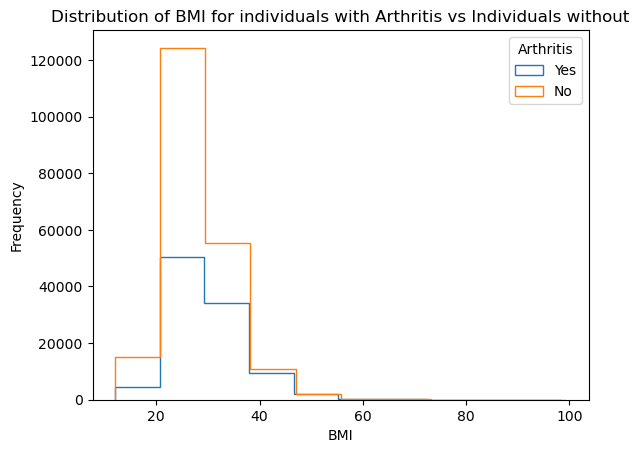

TtestResult(statistic=74.11381991171322, pvalue=0.0, df=179364.30148979733)

In [381]:
CVD_data_df.loc[(CVD_data_df['Arthritis']=='Yes')]['BMI'].plot(kind='hist', histtype='step')
CVD_data_df.loc[(CVD_data_df['Arthritis']=='No')]['BMI'].plot(kind='hist', histtype='step', xlabel='BMI',
                                                             title='Distribution of BMI for individuals with Arthritis vs Individuals without')
plt.legend(labels=['Yes', 'No'], loc='upper right', title= 'Arthritis')
# plt.set_
plt.show()
st.ttest_ind(CVD_data_df.loc[(CVD_data_df['Arthritis']=='Yes')]['BMI'], CVD_data_df.loc[(CVD_data_df['Arthritis']=='No')]['BMI'], equal_var=False)

### Analysis:
As reflected below, the p-value of 0.0 indicates the variance in the means of people with Arthritis vs people without Arthritis is statistically significant and not happening by chance and therefore incidence of Arthritis is influenced by a person's BMI

## T-Tests Arthritis vs BMI for Females with Arthritis vs Males with Arthritis
### Alternative Hypothesis:
The incidence of arthritis is related to the difference in BMI score for each sex.

### Null Hypothesis:
The incidence of arthritis in individuals is unrelated to the BMI scores for each sex and the difference in the mean BMI between to the two groups we are seeing is to be expected by chance.



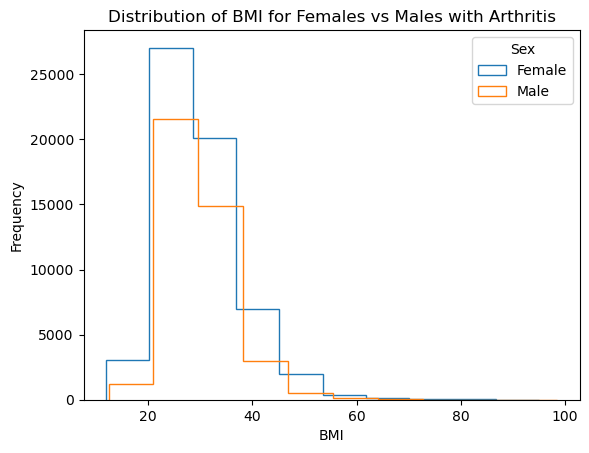

In [411]:
CVD_data_df.loc[(CVD_data_df['Arthritis']=='Yes') & (CVD_data_df['Sex']=='Female')]['BMI'].plot(kind='hist', histtype='step')
CVD_data_df.loc[(CVD_data_df['Arthritis']=='Yes') & (CVD_data_df['Sex']=='Male')]['BMI'].plot(
    kind='hist', histtype='step', xlabel='BMI', title='Distribution of BMI for Females vs Males with Arthritis')
plt.legend(labels=['Female', 'Male'], loc='upper right', title= 'Sex')
plt.show()
st.ttest_ind(CVD_data_df.loc[(CVD_data_df['Arthritis']=='Yes') & (CVD_data_df['Sex']=='Female')]['BMI'], 
             CVD_data_df.loc[(CVD_data_df['Arthritis']=='Yes')& (CVD_data_df['Sex']=='Male')]['BMI'], equal_var=False)
plt.show()

### Analysis:
As reflected above, the p-value of 0.08 indicates the variance in the mean we are seeing may be happening by chance and the incidence of Arthritis appears unrelated to the BMI of each sex.

## One Way ANOVA for BMI by Age Category for Individuals with Arthritis
### Alternative Hypothesis:
There is a statistically significant difference in BMI scores based on Age Category for people with Arthritis.
### Null Hypothesis:
The mean BMI by age category are statistically the same.
### Analysis
The One-Way ANOVA test yields a statistic of 380.8 and a p-value of 0.0, therefore we must reject the null hypothesis in favor of the Alternative hypothesis and conclude the means of BMI are statistically influenced by the age category.




In [21]:
group0 = CVD_data_df.loc[(CVD_data_df['Age_Category']=='18-24') & (CVD_data_df['Arthritis'] == 'Yes')]['BMI']
group1 = CVD_data_df.loc[(CVD_data_df['Age_Category']=='25-29') & (CVD_data_df['Arthritis'] == 'Yes')]['BMI']
group2 = CVD_data_df.loc[(CVD_data_df['Age_Category']=='30-34') & (CVD_data_df['Arthritis'] == 'Yes')]['BMI']
group3 = CVD_data_df.loc[(CVD_data_df['Age_Category']=='35-39') & (CVD_data_df['Arthritis'] == 'Yes')]['BMI']
group4 = CVD_data_df.loc[(CVD_data_df['Age_Category']=='40-44') & (CVD_data_df['Arthritis'] == 'Yes')]['BMI']
group5 = CVD_data_df.loc[(CVD_data_df['Age_Category']=='45-49') & (CVD_data_df['Arthritis'] == 'Yes')]['BMI']
group6 = CVD_data_df.loc[(CVD_data_df['Age_Category']=='50-54') & (CVD_data_df['Arthritis'] == 'Yes')]['BMI']
group7 = CVD_data_df.loc[(CVD_data_df['Age_Category']=='55-59') & (CVD_data_df['Arthritis'] == 'Yes')]['BMI']
group8 = CVD_data_df.loc[(CVD_data_df['Age_Category']=='60-64') & (CVD_data_df['Arthritis'] == 'Yes')]['BMI']
group9 = CVD_data_df.loc[(CVD_data_df['Age_Category']=='65-69') & (CVD_data_df['Arthritis'] == 'Yes')]['BMI']
group10 = CVD_data_df.loc[(CVD_data_df['Age_Category']=='70-74') & (CVD_data_df['Arthritis'] == 'Yes')]['BMI']
group11 = CVD_data_df.loc[(CVD_data_df['Age_Category']=='75-79') & (CVD_data_df['Arthritis'] == 'Yes')]['BMI']
group12 = CVD_data_df.loc[(CVD_data_df['Age_Category']=='80+') & (CVD_data_df['Arthritis'] == 'Yes')]['BMI']
st.f_oneway(group0, group1, group2, group3, group4, group5, group6, group7, group8, group9, group10, group11, group12)

F_onewayResult(statistic=380.82481240101345, pvalue=0.0)

In [383]:
# CVD_data_df.loc[(CVD_data_df['Arthritis']=='Yes')].boxplot('BMI', by='Age_Category', figsize=(20,10))
arthritis_by_age = pd.DataFrame({'Female':CVD_data_df.loc[(CVD_data_df['Sex']=='Female')].groupby('Age_Category')['Arthritis'].count(),
                                 'Male':CVD_data_df.loc[(CVD_data_df['Sex']=='Male')].groupby('Age_Category')['Arthritis'].count(),
                                 'Female Yes':CVD_data_df.loc[(CVD_data_df['Arthritis']=='Yes')&(CVD_data_df['Sex']=='Female')].groupby('Age_Category')['Arthritis'].count(),
                                 'Female No':CVD_data_df.loc[(CVD_data_df['Arthritis']=='No')&(CVD_data_df['Sex']=='Female')].groupby('Age_Category')['Arthritis'].count(),
                                 'Male Yes':CVD_data_df.loc[(CVD_data_df['Arthritis']=='Yes')&(CVD_data_df['Sex']=='Male')].groupby('Age_Category')['Arthritis'].count(),
                                 'Male No':CVD_data_df.loc[(CVD_data_df['Arthritis']=='No')&(CVD_data_df['Sex']=='Male')].groupby('Age_Category')['Arthritis'].count(),
                                })

# age_cateory_arthritis

# arthritis_by_age['Percent_Yes'] = arthritis_by_age['Yes']/arthritis_by_age[['Yes','No']].sum(axis=1)*100
arthritis_by_age['Percent Yes Female'] = arthritis_by_age['Female Yes']/arthritis_by_age[['Female Yes','Female No']].sum(axis=1)*100
arthritis_by_age['Percent Yes Male'] = arthritis_by_age['Male Yes']/arthritis_by_age[['Male Yes','Male No']].sum(axis=1)*100
arthritis_by_age


,Female,Male,Female Yes,Female No,Male Yes,Male No,Percent Yes Female,Percent Yes Male
Age_Category,,,,,,,,
18-24,8215,10466,345,7870,247,10219,4.199635,2.360023
25-29,7118,8376,539,6579,386,7990,7.572352,4.608405
30-34,8963,9465,963,8000,655,8810,10.744170,6.920232
35-39,10367,10239,1509,8858,1170,9069,14.555802,11.426897
40-44,11203,10392,2178,9025,1509,8883,19.441221,14.520785
45-49,11000,9968,2913,8087,2024,7944,26.481818,20.304976
50-54,12968,12129,4339,8629,3060,9069,33.459284,25.228791
55-59,14660,13394,5897,8763,4178,9216,40.225102,31.193072
60-64,16969,15449,8061,8908,5813,9636,47.504272,37.627031


In [207]:
arthritis_by_age.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 18-24 to 80+
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Yes                 13 non-null     int64  
 1   No                  13 non-null     int64  
 2   Female Yes          13 non-null     int64  
 3   Female No           13 non-null     int64  
 4   Male Yes            13 non-null     int64  
 5   Male No             13 non-null     int64  
 6   Percent_Yes         13 non-null     float64
 7   Percent Yes Female  13 non-null     float64
 8   Percent Yes Male    13 non-null     float64
dtypes: float64(3), int64(6)
memory usage: 1.0+ KB


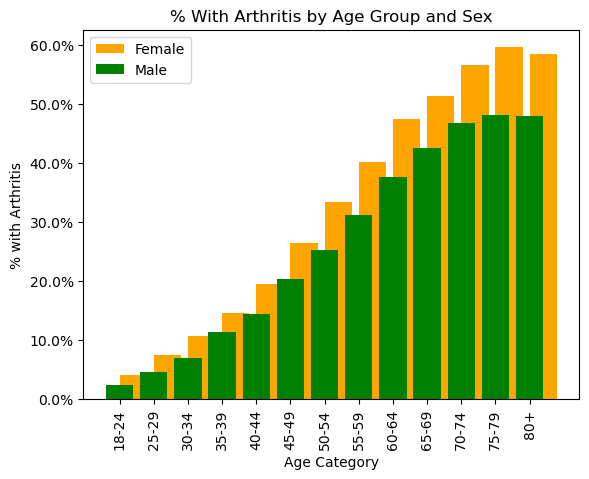

In [244]:
ax = plt.subplot()
# plt.bar(arthritis_by_age.index, arthritis_by_age['Percent_Yes'], align='center', color='red')
group1=arthritis_by_age['Percent Yes Female']
group2=arthritis_by_age['Percent Yes Male']
plt.bar(arthritis_by_age.index, group1, align='edge', color='orange', label='Female')
plt.bar(arthritis_by_age.index, group2, align='center', color = 'green', label='Male')
plt.xlabel('Age Category')
plt.xticks(rotation=90)
plt.ylabel('% with Arthritis')
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%2.1f%%'))
# plt.tick_params(rotation=90)
plt.legend(['Female', 'Male'], loc='upper left')
plt.title('% With Arthritis by Age Group and Sex')
plt.show()

In [279]:

myChisqr2 = arthritis_by_age[['Female','Male']]
chi2_stat, p_value, dof, expected = st.chi2_contingency(myChisqr2)
print('Chi 2 Stat ', chi2_stat)
print('P-value ', p_value)
print('Degrees of Freedom ', dof)
print('Expected ', expected)
print(f'The P-value of {p_value}, is less than 0.05 so we must reject the null hypothesis in favour of the alternative')

Chi 2 Stat  1391.3318267764926
P-value  1.028213032361724e-290
Degrees of Freedom  12
Expected  [[ 9689.43732637  8991.56267363]
 [ 8036.40821877  7457.59178123]
 [ 9558.21160807  8869.78839193]
 [10687.89387866  9918.10612134]
 [11200.86714111 10394.13285889]
 [10875.65557836 10092.34442164]
 [13017.28004818 12079.71995182]
 [14551.01304824 13502.98695176]
 [16814.52701924 15603.47298076]
 [17341.50460735 16092.49539265]
 [16132.46449131 14970.53550869]
 [10739.24307278  9965.75692722]
 [11551.49396155 10719.50603845]]
The P-value of 1.028213032361724e-290, is less than 0.05 so we must reject the null hypothesis in favour of the alternative


In [282]:
myChisqr2

,Female,Male
Age_Category,,
18-24,8215,10466
25-29,7118,8376
30-34,8963,9465
35-39,10367,10239
40-44,11203,10392
45-49,11000,9968
50-54,12968,12129
55-59,14660,13394
60-64,16969,15449


# Analysis of the Incidence of Depression by Sex

In [401]:
# 'Male':CVD_data_df.loc[(CVD_data_df['Sex']=='Male')].groupby
Depression_by_sex=CVD_data_df.groupby(['Depression','Sex'])['Depression'].count()
Depression_by_sex

Depression  Sex   
No          Female    119351
            Male      127602
Yes         Female     40845
            Male       21056
Name: Depression, dtype: int64

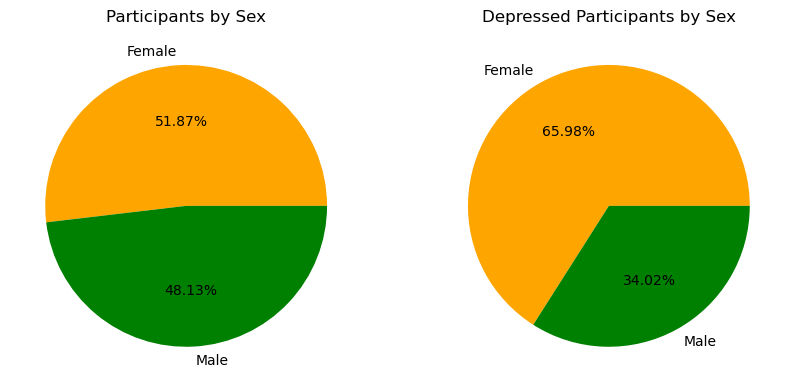

In [410]:
fig1, axes = plt.subplots(1,2, figsize=(10,10))

axes[0].pie(sex_df, labels=['Female','Male'], autopct='%2.2f%%', colors=['orange','green'] )
# plt.pie(sex_df, autopct = '%2.2f%%', colors=['orange','green'], labels=['Female', 'Male'])
axes[0].set_title('Participants by Sex')
axes[1].pie(Depression_by_sex['Yes'], labels=['Female', 'Male'], autopct='%2.2f%%', colors=['orange','green'] )
axes[1].set_title('Depressed Participants by Sex')
plt.show()

In [404]:
Depression_by_sex

Depression  Sex   
No          Female    119351
            Male      127602
Yes         Female     40845
            Male       21056
Name: Depression, dtype: int64

In [408]:
observed =[]
expected=[]
observed = pd.Series([arthritis_by_sex[0],Depression_by_sex[1]], index=['Female','Male'])
expected = pd.Series([arthritis_by_sex[2],Depression_by_sex[3]], index=['Female','Male'])
myChisqr3 = pd.DataFrame([observed, expected]).T
myChisqr3.columns = [['No Depression', 'With Depression']]

myChisqr3

,No Depression,With Depression
Female,100528,59668
Male,127602,21056


## Chi-Square Contingency Table Analysis of Depression vs Sex:
### Alternative Hypothesis:
The incidence of depression is related to the sex of an individual.

### Null Hypothesis:
The distribution of indviduals having depression by sex is the same as the distribution of inviduals by sex for individuals who don't have Arthritis and therefore depression is unrelated to the sex of the individual and the variance we are seeing is by chance.

In [409]:
chi2_stat, p_value, dof, expected = st.chi2_contingency(myChisqr3)
print('Chi 2 Stat ', chi2_stat)
print('P-value ', p_value)
print('Degrees of Freedom ', dof)
print('Expected ', expected)
print(f'The P-value of {p_value}, is less than 0.05 so we must reject the null hypothesis in favour of the alternative')

Chi 2 Stat  21279.497556103815
P-value  0.0
Degrees of Freedom  1
Expected  [[118326.17832374  41869.82167626]
 [109803.82167626  38854.17832374]]
The P-value of 0.0, is less than 0.05 so we must reject the null hypothesis in favour of the alternative


### Analysis:
Using the distribution of individuals who do not have depression by sex and comparing that to the observed distribution of individuals who have depression by sex, the chi-square contingency analysis results in a p-value of 0.0. This suggests there is no statistical relationship between the two groups and the observed variation we see is not happening by chance and we must reject the null hypothesis and assume the changes in the incidence of depression by sex is significnant. 

In [271]:
depression_by_age = pd.DataFrame({'Female':CVD_data_df.loc[(CVD_data_df['Sex']=='Female')].groupby('Age_Category')['Depression'].count(),
                                 'Male':CVD_data_df.loc[(CVD_data_df['Sex']=='Male')].groupby('Age_Category')['Depression'].count(),
                                 'Female Yes':CVD_data_df.loc[(CVD_data_df['Depression']=='Yes')&(CVD_data_df['Sex']=='Female')].groupby('Age_Category')['Depression'].count(),
                                 'Female No':CVD_data_df.loc[(CVD_data_df['Depression']=='No')&(CVD_data_df['Sex']=='Female')].groupby('Age_Category')['Depression'].count(),
                                 'Male Yes':CVD_data_df.loc[(CVD_data_df['Depression']=='Yes')&(CVD_data_df['Sex']=='Male')].groupby('Age_Category')['Depression'].count(),
                                 'Male No':CVD_data_df.loc[(CVD_data_df['Depression']=='No')&(CVD_data_df['Sex']=='Male')].groupby('Age_Category')['Depression'].count(),
                                })


In [273]:
depression_by_age['Percent Yes Female'] = depression_by_age['Female Yes']/depression_by_age[['Female Yes','Female No']].sum(axis=1)*100
depression_by_age['Percent Yes Male'] = depression_by_age['Male Yes']/depression_by_age[['Male Yes','Male No']].sum(axis=1)*100
depression_by_age


,Female,Male,Female Yes,Female No,Male Yes,Male No,Percent Yes Female,Percent Yes Male
Age_Category,,,,,,,,
18-24,8215,10466,2857,5358,1931,8535,34.777845,18.450220
25-29,7118,8376,2538,4580,1537,6839,35.656083,18.350048
30-34,8963,9465,2874,6089,1691,7774,32.065157,17.865821
35-39,10367,10239,3127,7240,1778,8461,30.163017,17.364977
40-44,11203,10392,3232,7971,1635,8757,28.849415,15.733256
45-49,11000,9968,3149,7851,1440,8528,28.627273,14.446228
50-54,12968,12129,3637,9331,1774,10355,28.045959,14.626103
55-59,14660,13394,4032,10628,1938,11456,27.503411,14.469165
60-64,16969,15449,4543,12426,2157,13292,26.772350,13.962069


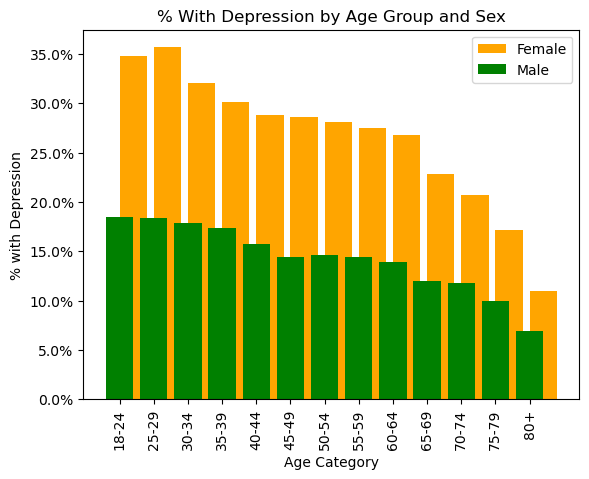

In [276]:
ax = plt.subplot()
# plt.bar(depression_by_age.index, depression_by_age['Percent_Yes'], align='center', color='red')
group1=depression_by_age['Percent Yes Female']
group2=depression_by_age['Percent Yes Male']
plt.bar(depression_by_age.index, group1, align='edge', color='orange', label='Female')
plt.bar(depression_by_age.index, group2, align='center', color = 'green', label='Male')
plt.xlabel('Age Category')
plt.xticks(rotation=90)
plt.ylabel('% with Depression')
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%2.1f%%'))
# plt.tick_params(rotation=90)
plt.legend(['Female', 'Male'], loc='upper right')
plt.title('% With Depression by Age Group and Sex')
plt.show()

# Conclusions:
## Arthritis:
There is a strong relationship dectected between the incidence of arthritis and sex, where women appear to have a higher incidence of arthritis when compared to men.  Analysis shows the incidence of arthritis is related to an individuals BMI score and age but neither of these factors appear to explain the delta in the frequency of arthritis by sex within the studied population.
## Depression:
We detected a strong relationship between the incidencee of depression and sex, where women experience depression at a higher rate than men.  This variance holds through all age categories.  Unlike the incidence of Arthritis however, the incidence of depression appears to decline as individuals age.